# Check-in time analysis

* In this notebook we investigate some temporal characteristics of check-ins:
  * Check-ins per hour, week, and month
* We find and visualize pairs of places with highly correlated temporal check-in patterns

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
# Enable grid by default
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('train.csv')

# Construct per-{day,hour,month} features
df['day'] = np.floor(df['time'] / (24*60.0))
df['hour'] = np.floor(np.mod((df['time'] / 60), 24))
df['month'] = np.floor(np.mod(df['time'] / float(60*24*30), 12))

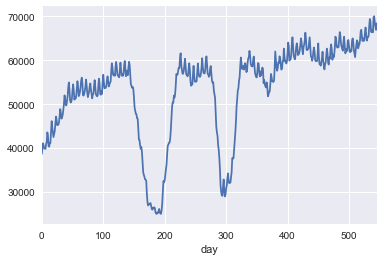

In [3]:
# Checkins per day
df.groupby(['day']).count().x.plot()

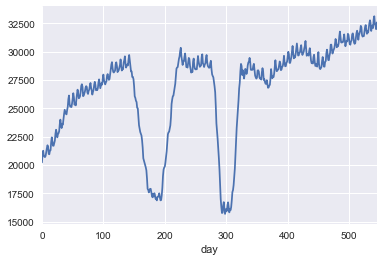

In [4]:
# Unique checkins per day
ax = df.groupby(['day'])['place_id'].unique().apply(len).plot()

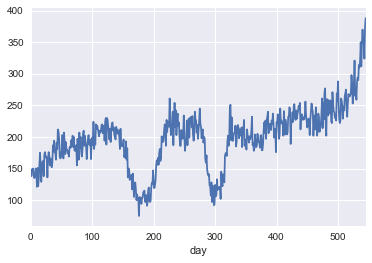

In [5]:
# First time place check-in per day
df.drop_duplicates(['place_id']).groupby(['day'])['place_id'].unique().apply(len).plot()

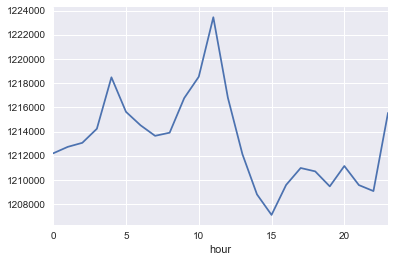

In [6]:
# Check-ins per hour
df.groupby(['hour'])['place_id'].count().plot()

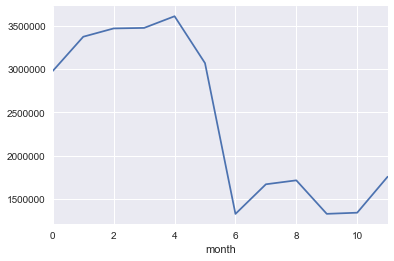

In [7]:
# Check-ins per month
df.groupby(['month']).count().x.plot()

### Correlated check-ins
* Discover hidden patterns in check-in behavior between pairs of places
* Find correlation coeffecient between hourly check-in stats for pairs of places
* Visualize several of the top most correlated

In [8]:
hourplacecnt = df.groupby(['hour','place_id']).count()

# Unstack to form a DF where rows=hours, cols=place checkin count
uhourplacecnt = hourplacecnt['x'].unstack().fillna(0)

# Form pairwise correlation between columns, stacked into multi-index
stackcov = abs(uhourplacecnt[uhourplacecnt.columns[:1000]].corr().stack())

# Sort by descending correlation
hourplacecorr = stackcov[(stackcov<1)&(stackcov>-1)&(~stackcov.duplicated())].sort_values(ascending=False)

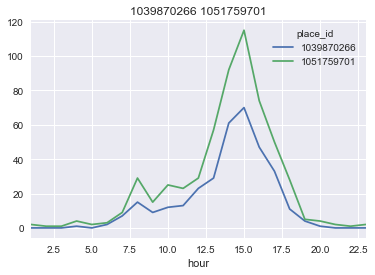

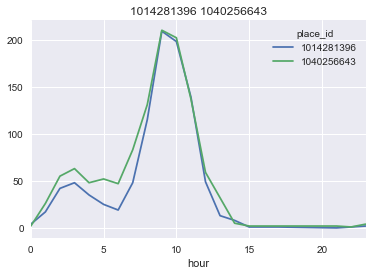

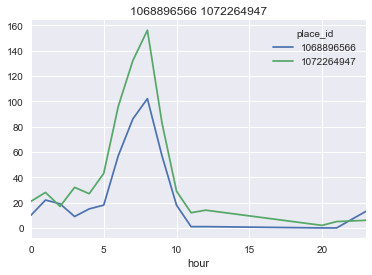

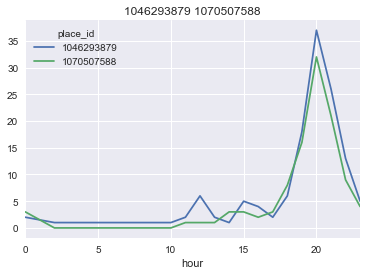

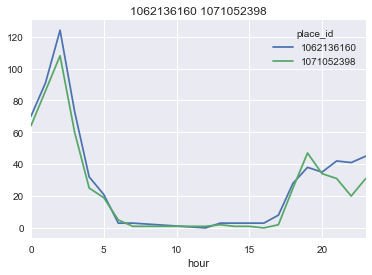

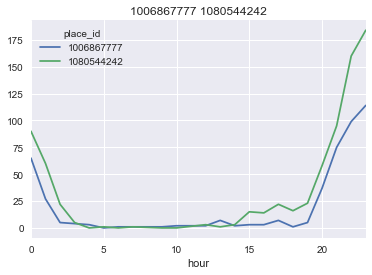

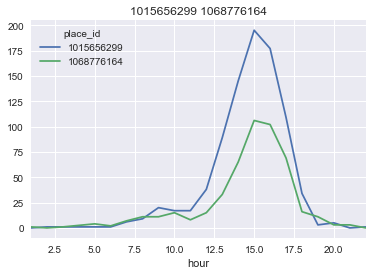

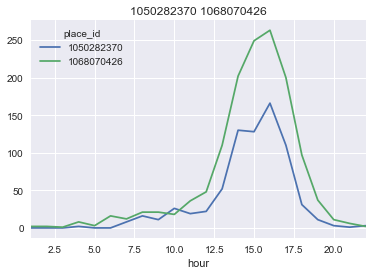

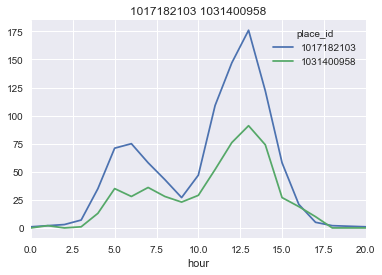

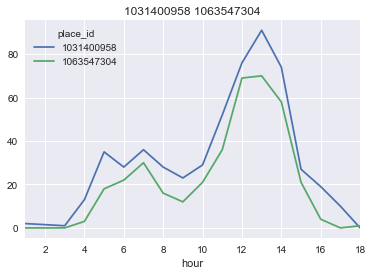

In [9]:
# Plot top correlated place check-in patterns
for i in hourplacecorr.iloc[:10].index:
    plt.figure()
    df[df.place_id.isin(i)].groupby(['hour','place_id'])['x'] \
        .count().unstack().fillna(0).plot(title=' '.join(map(str, i)))